Optimal Procurement Policy: [7 0 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


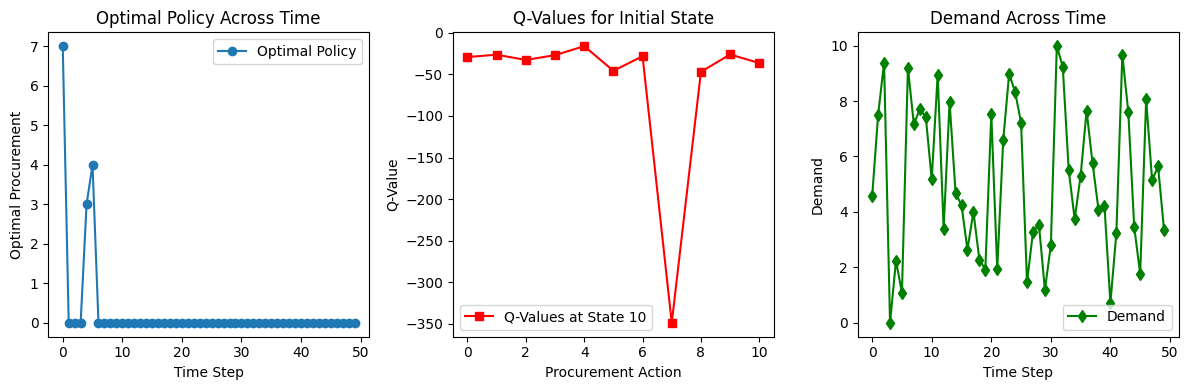

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
horizon = 50  # Number of time steps
num_episodes = 1000  # Number of Monte Carlo simulations
U_max = 10  # Maximum procurement
p = 2  # Procurement cost per unit
a = 1  # Storage cost per unit
b = 5  # Backlog cost per unit
gamma = 0.9  # Discount factor for future rewards

# Demand distribution
W_min, W_max = 0, 10
def sample_demand():
    return np.random.uniform(W_min, W_max)

# Holding cost function
def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Q-learning initialization
Q = np.zeros((horizon + 1, 21, U_max + 1))  # Q-values (time, state, action)
def get_state(x):
    return min(max(int(x) + 10, 0), 20)  # Normalize state between 0 and 20

def finite_horizon_q_learning(num_episodes):
    for episode in range(num_episodes):
        X = np.zeros(horizon + 1)  # Inventory levels
        for t in range(horizon):
            state = get_state(X[t])
            if np.random.rand() < 0.1:
                Ut = np.random.randint(0, U_max + 1)  # Exploration
            else:
                Ut = np.argmin(Q[t, state])  # Exploitation
            
            Wt = sample_demand()  # Random demand
            X[t + 1] = X[t] + Ut - Wt  # Inventory update
            next_state = get_state(X[t + 1])
            reward = - (holding_cost(X[t + 1]) + p * Ut)  # Negative cost as reward
            
            alpha = 1 / (episode + 1) ** 0.6  # Learning rate decay
            Q[t, state, Ut] = (1 - alpha) * Q[t, state, Ut] + alpha * (
                reward + gamma * np.min(Q[t + 1, next_state])
            )

finite_horizon_q_learning(num_episodes)

# Extract optimal policy
optimal_policy = np.argmin(Q[:horizon, 10], axis=1)  # State 10 (initial normalized state)
print("Optimal Procurement Policy:", optimal_policy)

# Plot results
plt.figure(figsize=(12, 4))

# Plot Optimal Policy
plt.subplot(1, 3, 1)
plt.plot(range(horizon), optimal_policy, marker='o', linestyle='-', label='Optimal Policy')
plt.xlabel("Time Step")
plt.ylabel("Optimal Procurement")
plt.title("Optimal Policy Across Time")
plt.legend()

# Plot Q-values for a sample state
plt.subplot(1, 3, 2)
plt.plot(range(U_max + 1), Q[0, 10], marker='s', linestyle='-', color='r', label='Q-Values at State 10')
plt.xlabel("Procurement Action")
plt.ylabel("Q-Value")
plt.title("Q-Values for Initial State")
plt.legend()

# Simulate a single run and plot demand
X_sim = np.zeros(horizon + 1)
W_sim = np.array([sample_demand() for _ in range(horizon)])

plt.subplot(1, 3, 3)
plt.plot(range(horizon), W_sim, marker='d', linestyle='-', color='g', label='Demand')
plt.xlabel("Time Step")
plt.ylabel("Demand")
plt.title("Demand Across Time")
plt.legend()

plt.tight_layout()
plt.show()

## Removing state normalization

Optimal Procurement Policy: {-10: 0, -9: 0, -8: 0, -7: 5, -6: 0, -5: 0, -4: 0, -3: 0, -2: 0, -1: 0, 0: 1, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}


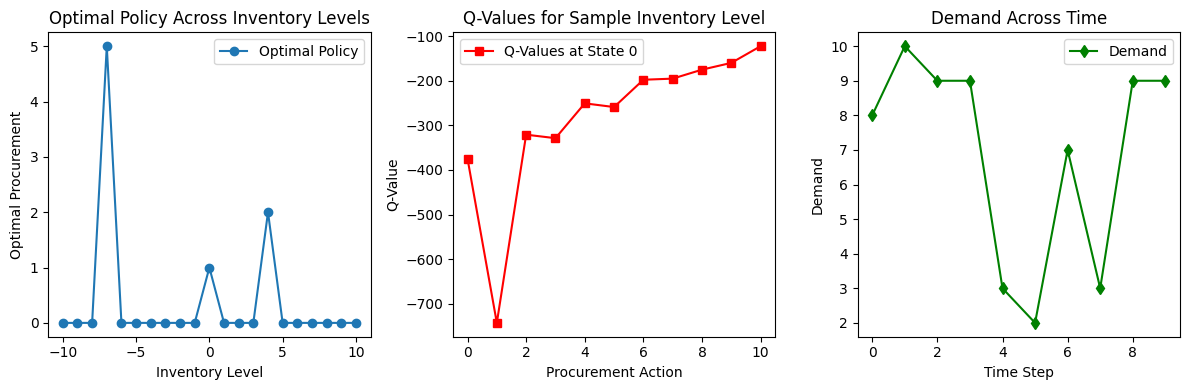

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
horizon = 10  # Number of time steps
num_episodes = 10000  # Number of Monte Carlo simulations
U_max = 10  # Maximum procurement
p = 2  # Procurement cost per unit
a = 1  # Storage cost per unit
b = 5  # Backlog cost per unit
gamma = 0.9  # Discount factor for future rewards
epsilon = 0.1  # Exploration probability

# Demand distribution
W_min, W_max = 0, 10
def sample_demand():
    return np.random.randint(W_min, W_max + 1)  # Discrete demand

# Holding cost function
def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Q-learning initialization
Q = {}  # Dictionary to store Q-values dynamically

def get_state(x):
    return int(round(x))  # Discretize state to nearest integer

def finite_horizon_q_learning(num_episodes):
    for episode in range(num_episodes):
        X = np.zeros(horizon + 1, dtype=int)  # Inventory levels (discrete)
        for t in range(horizon):
            state = get_state(X[t])
            if state not in Q:
                Q[state] = np.zeros(U_max + 1)  # Initialize Q-values
            
            if np.random.rand() < epsilon:
                Ut = np.random.randint(0, U_max + 1)  # Exploration
            else:
                Ut = np.argmin(Q[state])  # Greedy selection
            
            Wt = sample_demand()  # Random demand
            X[t + 1] = get_state(X[t] + Ut - Wt)  # Inventory update (discrete)
            next_state = X[t + 1]
            if next_state not in Q:
                Q[next_state] = np.zeros(U_max + 1)  # Initialize new state
            
            reward = - (holding_cost(X[t + 1]) + p * Ut)  # Negative cost as reward
            alpha = 1 / (episode + 1) ** 0.6  # Learning rate decay
            Q[state][Ut] = (1 - alpha) * Q[state][Ut] + alpha * (
                reward + gamma * np.min(Q[next_state])
            )

finite_horizon_q_learning(num_episodes)

# Extract optimal policy for a range of inventory levels
sample_states = range(-10, 11)
optimal_policy = {s: np.argmin(Q[s]) for s in sample_states if s in Q}
print("Optimal Procurement Policy:", optimal_policy)

# Plot results
plt.figure(figsize=(12, 4))

# Plot Optimal Policy
plt.subplot(1, 3, 1)
plt.plot(optimal_policy.keys(), optimal_policy.values(), marker='o', linestyle='-', label='Optimal Policy')
plt.xlabel("Inventory Level")
plt.ylabel("Optimal Procurement")
plt.title("Optimal Policy Across Inventory Levels")
plt.legend()

# Plot Q-values for a sample state
sample_state = 0
if sample_state in Q:
    plt.subplot(1, 3, 2)
    plt.plot(range(U_max + 1), Q[sample_state], marker='s', linestyle='-', color='r', label=f'Q-Values at State {sample_state}')
    plt.xlabel("Procurement Action")
    plt.ylabel("Q-Value")
    plt.title("Q-Values for Sample Inventory Level")
    plt.legend()

# Simulate a single run and plot demand
X_sim = np.zeros(horizon + 1, dtype=int)
W_sim = np.array([sample_demand() for _ in range(horizon)])

plt.subplot(1, 3, 3)
plt.plot(range(horizon), W_sim, marker='d', linestyle='-', color='g', label='Demand')
plt.xlabel("Time Step")
plt.ylabel("Demand")
plt.title("Demand Across Time")
plt.legend()

plt.tight_layout()
plt.show()


## Formulation with rewards as positive

Optimal Procurement Policy: {-10: 0, -9: 0, -8: 4, -7: 0, -6: 0, -5: 0, -4: 6, -3: 0, -2: 0, -1: 0, 0: 0, 1: 0, 2: 0, 3: 5, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 2, 10: 6}


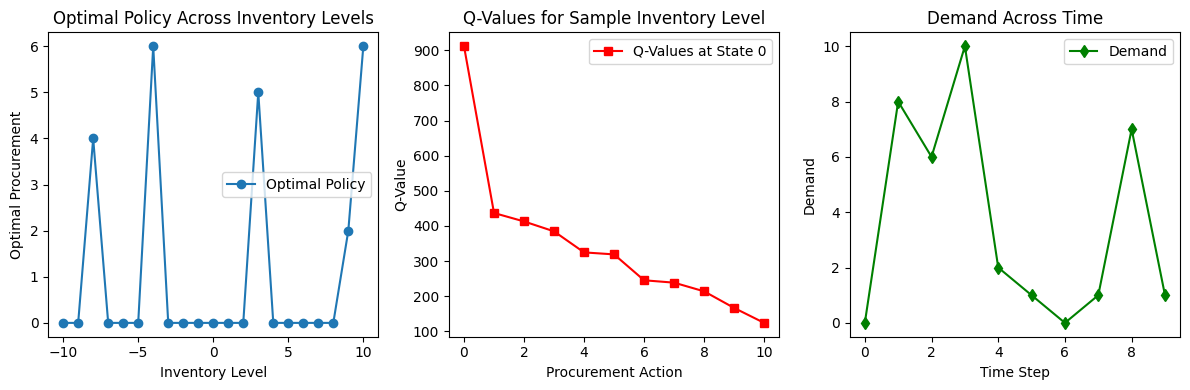

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
horizon = 10  # Number of time steps
num_episodes = 10000  # Number of Monte Carlo simulations
U_max = 10  # Maximum procurement
p = 2  # Procurement cost per unit
a = 1  # Storage cost per unit
b = 5  # Backlog cost per unit
gamma = 0.9  # Discount factor for future rewards
epsilon = 0.1  # Exploration probability

# Demand distribution
W_min, W_max = 0, 10
def sample_demand():
    return np.random.randint(W_min, W_max + 1)  # Discrete demand

# Holding cost function
def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Q-learning initialization
Q = {}  # Dictionary to store Q-values dynamically

def get_state(x):
    return int(round(x))  # Discretize state to nearest integer

def finite_horizon_q_learning(num_episodes):
    for episode in range(num_episodes):
        X = np.zeros(horizon + 1, dtype=int)  # Inventory levels (discrete)
        for t in range(horizon):
            state = get_state(X[t])
            if state not in Q:
                Q[state] = np.zeros(U_max + 1)  # Initialize Q-values
            
            if np.random.rand() < epsilon:
                Ut = np.random.randint(0, U_max + 1)  # Exploration
            else:
                Ut = np.argmax(Q[state])  # Greedy selection (maximize reward)
            
            Wt = sample_demand()  # Random demand
            X[t + 1] = get_state(X[t] + Ut - Wt)  # Inventory update (discrete)
            next_state = X[t + 1]
            if next_state not in Q:
                Q[next_state] = np.zeros(U_max + 1)  # Initialize new state
            
            reward = holding_cost(X[t + 1]) + p * (U_max - Ut)  # Positive reward formulation
            alpha = 1 / (episode + 1) ** 0.6  # Learning rate decay
            Q[state][Ut] = (1 - alpha) * Q[state][Ut] + alpha * (
                reward + gamma * np.max(Q[next_state])
            )

finite_horizon_q_learning(num_episodes)

# Extract optimal policy for a range of inventory levels
sample_states = range(-10, 11)
optimal_policy = {s: np.argmax(Q[s]) for s in sample_states if s in Q}
print("Optimal Procurement Policy:", optimal_policy)

# Plot results
plt.figure(figsize=(12, 4))

# Plot Optimal Policy
plt.subplot(1, 3, 1)
plt.plot(optimal_policy.keys(), optimal_policy.values(), marker='o', linestyle='-', label='Optimal Policy')
plt.xlabel("Inventory Level")
plt.ylabel("Optimal Procurement")
plt.title("Optimal Policy Across Inventory Levels")
plt.legend()

# Plot Q-values for a sample state
sample_state = 0
if sample_state in Q:
    plt.subplot(1, 3, 2)
    plt.plot(range(U_max + 1), Q[sample_state], marker='s', linestyle='-', color='r', label=f'Q-Values at State {sample_state}')
    plt.xlabel("Procurement Action")
    plt.ylabel("Q-Value")
    plt.title("Q-Values for Sample Inventory Level")
    plt.legend()

# Simulate a single run and plot demand
X_sim = np.zeros(horizon + 1, dtype=int)
W_sim = np.array([sample_demand() for _ in range(horizon)])

plt.subplot(1, 3, 3)
plt.plot(range(horizon), W_sim, marker='d', linestyle='-', color='g', label='Demand')
plt.xlabel("Time Step")
plt.ylabel("Demand")
plt.title("Demand Across Time")
plt.legend()

plt.tight_layout()
plt.show()


# Time dependent q values

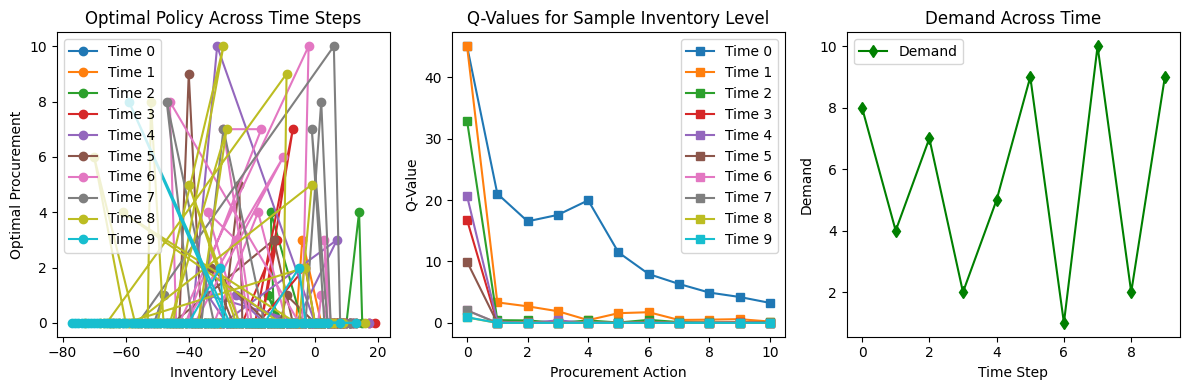

In [ ]:
import numpy as np
import matplotlib.pyplot as plt






# Parameters
horizon = 10  # Number of time steps
num_episodes = 10000  # Number of Monte Carlo simulations
U_max = 10  # Maximum procurement
p = 2  # Procurement cost per unit
a = 1  # Storage cost per unit
b = 5  # Backlog cost per unit






def sample_demand():
    return np.random.randint(0, 11)  # Discrete demand between 0 and 10

def holding_cost(x):
    return a * x if x >= 0 else -b * x




# Q-learning initialization
Q = {t: {} for t in range(horizon + 1)}

def get_state(x):
    return int(round(x))  # Discretize state to nearest integer

def finite_horizon_q_learning(num_episodes):


    for episode in range(num_episodes):

        X = np.zeros(horizon + 1, dtype=int)  # Inventory levels

        for t in range(horizon):
            
            state = get_state(X[t])

            if state not in Q[t]:
                Q[t][state] = np.zeros(U_max + 1)  # Initialize Q-values with 0 for time step t
            
            if np.random.rand() < 0.1:
                Ut = np.random.randint(0, U_max + 1)  # Exploration
            else:
                Ut = np.argmax(Q[t][state])  # Greedy selection
            
            Wt = sample_demand()  # Random demand

            X[t + 1] = get_state(X[t] + Ut - Wt)  # Inventory update
            next_state = X[t + 1]

            if next_state not in Q[t + 1]:
                Q[t + 1][next_state] = np.zeros(U_max + 1)
            
            reward = holding_cost(X[t + 1]) + p * (U_max - Ut)  # Positive reward formulation

            alpha = 1 / (episode + 1) ** 0.6  # Learning rate decay

            Q[t][state][Ut] = (1 - alpha) * Q[t][state][Ut] + alpha * (reward + (np.min(Q[t + 1][next_state]) if t < horizon - 1 else 0))



finite_horizon_q_learning(num_episodes)



# Extract optimal policy
optimal_policy = {t: {} for t in range(horizon)}
for t in range(horizon):
    for state in Q[t]:
        optimal_policy[t][state] = np.argmax(Q[t][state])




# Plot results
plt.figure(figsize=(12, 4))

# Plot Optimal Policy
plt.subplot(1, 3, 1)
for t in range(horizon):
    states = list(optimal_policy[t].keys())
    actions = list(optimal_policy[t].values())
    plt.plot(states, actions, marker='o', linestyle='-', label=f'Time {t}')
plt.xlabel("Inventory Level")
plt.ylabel("Optimal Procurement")
plt.title("Optimal Policy Across Time Steps")
plt.legend()

# Plot Q-values for a sample state at different time steps
sample_state = 0
plt.subplot(1, 3, 2)
for t in range(horizon):
    if sample_state in Q[t]:
        plt.plot(range(U_max + 1), Q[t][sample_state], marker='s', linestyle='-', label=f'Time {t}')
plt.xlabel("Procurement Action")
plt.ylabel("Q-Value")
plt.title("Q-Values for Sample Inventory Level")
plt.legend()

# Simulate a single run and plot demand
X_sim = np.zeros(horizon + 1, dtype=int)
W_sim = np.array([sample_demand() for _ in range(horizon)])

plt.subplot(1, 3, 3)
plt.plot(range(horizon), W_sim, marker='d', linestyle='-', color='g', label='Demand')
plt.xlabel("Time Step")
plt.ylabel("Demand")
plt.title("Demand Across Time")
plt.legend()

plt.tight_layout()
plt.show()


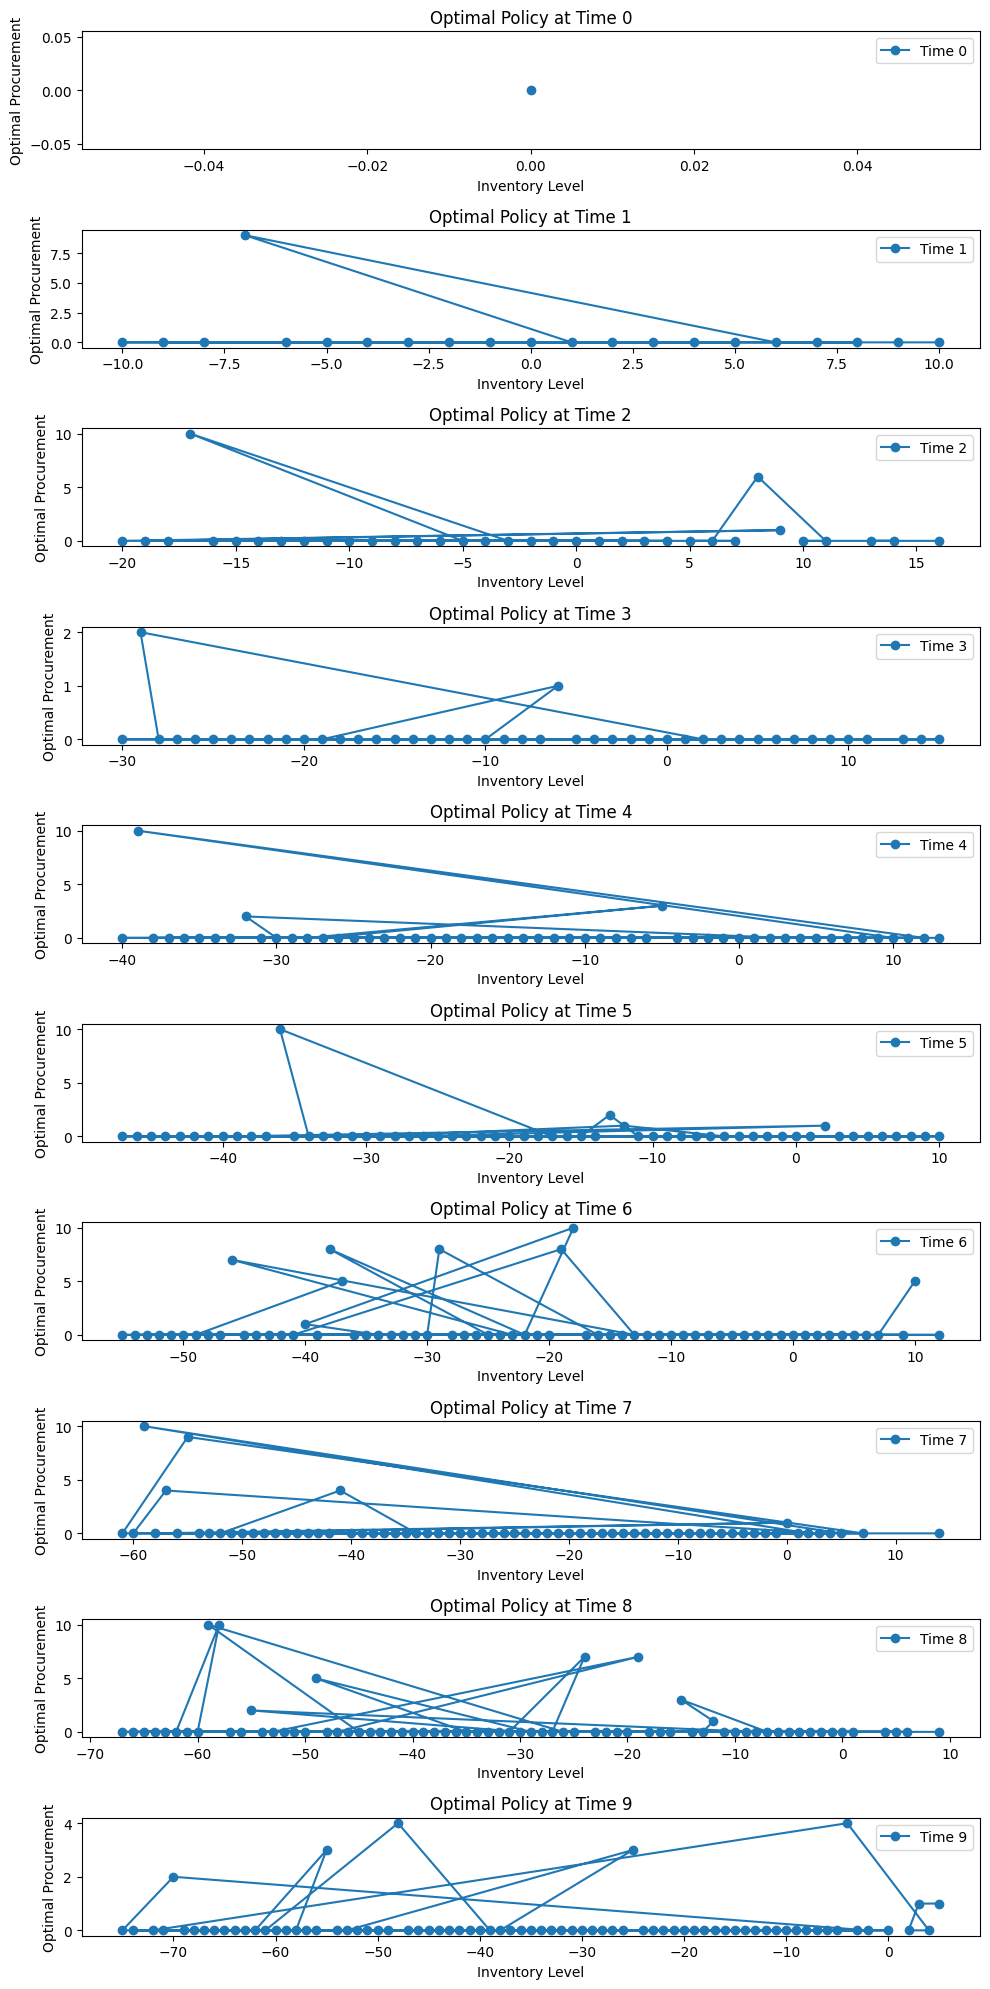

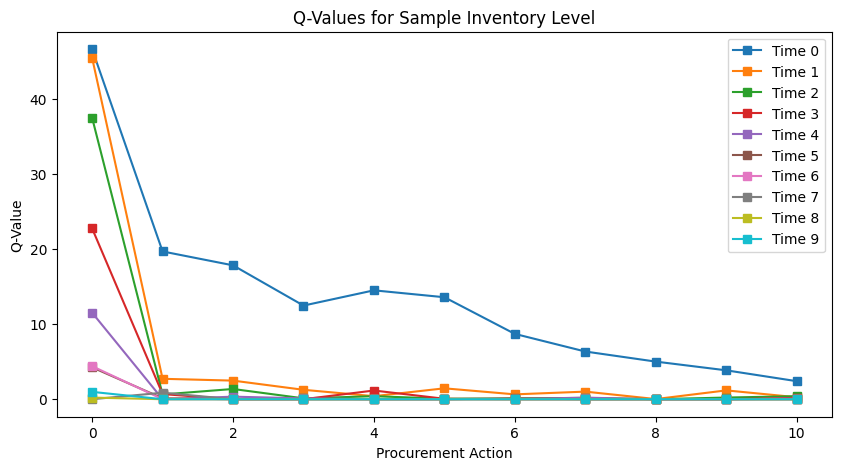

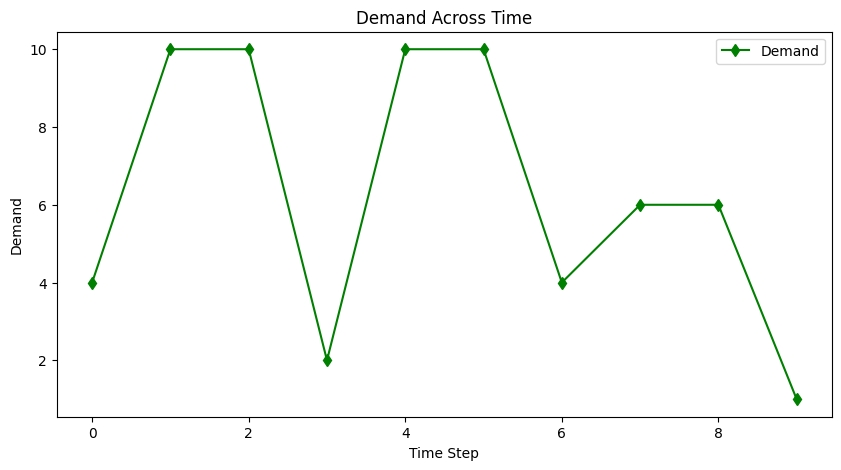

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

# Parameters
horizon = 10  # Number of time steps
num_episodes = 10000  # Number of Monte Carlo simulations
U_max = 10  # Maximum procurement
p = 2  # Procurement cost per unit
a = 1  # Storage cost per unit
b = 5  # Backlog cost per unit

def sample_demand():
    return np.random.randint(0, 11)  # Discrete demand between 0 and 10

def holding_cost(x):
    return a * x if x >= 0 else -b * x

# Q-learning initialization
Q = {t: {} for t in range(horizon + 1)}

def get_state(x):
    return int(round(x))  # Discretize state to nearest integer

def finite_horizon_q_learning(num_episodes):
    for episode in range(num_episodes):
        X = np.zeros(horizon + 1, dtype=int)  # Inventory levels
        for t in range(horizon):
            state = get_state(X[t])
            if state not in Q[t]:
                Q[t][state] = np.zeros(U_max + 1)  # Initialize Q-values for time step t
            
            if np.random.rand() < 0.1:
                Ut = np.random.randint(0, U_max + 1)  # Exploration
            else:
                Ut = np.argmax(Q[t][state])  # Greedy selection
            
            Wt = sample_demand()  # Random demand
            X[t + 1] = get_state(X[t] + Ut - Wt)  # Inventory update
            next_state = X[t + 1]
            if next_state not in Q[t + 1]:
                Q[t + 1][next_state] = np.zeros(U_max + 1)
            
            reward = holding_cost(X[t + 1]) + p * (U_max - Ut)  # Positive reward formulation
            alpha = 1 / (episode + 1) ** 0.6  # Learning rate decay
            Q[t][state][Ut] = (1 - alpha) * Q[t][state][Ut] + alpha * (
                reward + (np.min(Q[t + 1][next_state]) if t < horizon - 1 else 0)
            )

finite_horizon_q_learning(num_episodes)

# Extract optimal policy
optimal_policy = {t: {} for t in range(horizon)}
for t in range(horizon):
    for state in Q[t]:
        optimal_policy[t][state] = np.argmax(Q[t][state])

# Separate plots for different visualizations
fig, axes = plt.subplots(horizon, 1, figsize=(10, 20))
for t in range(horizon):
    states = list(optimal_policy[t].keys())
    actions = list(optimal_policy[t].values())
    axes[t].plot(states, actions, marker='o', linestyle='-', label=f'Time {t}')
    axes[t].set_xlabel("Inventory Level")
    axes[t].set_ylabel("Optimal Procurement")
    axes[t].set_title(f"Optimal Policy at Time {t}")
    axes[t].legend()
plt.tight_layout()
plt.show()

# Separate plot for Q-values of a sample state at different time steps
plt.figure(figsize=(10, 5))
sample_state = 0
for t in range(horizon):
    if sample_state in Q[t]:
        plt.plot(range(U_max + 1), Q[t][sample_state], marker='s', linestyle='-', label=f'Time {t}')
plt.xlabel("Procurement Action")
plt.ylabel("Q-Value")
plt.title("Q-Values for Sample Inventory Level")
plt.legend()
plt.show()

# Separate plot for demand simulation
plt.figure(figsize=(10, 5))
X_sim = np.zeros(horizon + 1, dtype=int)
W_sim = np.array([sample_demand() for _ in range(horizon)])
plt.plot(range(horizon), W_sim, marker='d', linestyle='-', color='g', label='Demand')
plt.xlabel("Time Step")
plt.ylabel("Demand")
plt.title("Demand Across Time")
plt.legend()
plt.show()
